<a href="https://colab.research.google.com/github/AndreiAf02/STAT561_Project/blob/main/Copy_of_STAT561_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STAT 561 Project - Sampling Methodologies in Improving Transfer Learning Efficiency in Diabetes Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models

# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

In [ ]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [ ]:
data2 = pd.concat([X, y], axis=1)
data2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [ ]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


In [ ]:
X['Education'].value_counts()

,count
Education,
6,107325
5,69910
4,62750
3,9478
2,4043
1,174


In [ ]:
X['Income'].value_counts()

,count
Income,
8,90385
7,43219
6,36470
5,25883
4,20135
3,15994
2,11783
1,9811


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [ ]:
scaler = StandardScaler()

# Columns to normalize
normalize_cols = ['BMI', 'MentHlth', 'PhysHlth']
data2[normalize_cols] = scaler.fit_transform(data2[normalize_cols])


In [ ]:
# # Separate features and target
# X = data2.drop(columns=['Diabetes_binary'])
# y = data2['Diabetes_binary']

## Model

In [ ]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, domain):
    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # # Evaluate on the test data
    # test_loss, test_accuracy = model.evaluate(X_test, y_test)
    # print(f"{domain} Domain Test Accuracy: {test_accuracy}")

    # # Predictions and confusion matrix
    # predicted = model.predict(X_test)
    # predicted = tf.squeeze(predicted)
    # predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    # actual = np.array(y_test)
    # conf_mat = confusion_matrix(actual, predicted)
    # displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    # displ.plot()

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")


# Splitting for Source and Target Domains:


## Full Dataset:

In [ ]:
data_S = data2[~data2['Education'].isin([1, 2])]  ## Source domain and classification
data_T = data2[data2['Education'].isin([1, 2])]  ## Target domain and classification

In [ ]:
data_S.shape

(249463, 22)

In [ ]:
data_T.shape

(4217, 22)

In [ ]:
data_S['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0,215347
1,34116


In [ ]:
# Separating Source Domain by Class
majority_class = data_S[data_S['Diabetes_binary'] == 0]
minority_class = data_S[data_S['Diabetes_binary'] == 1]

num_samples_needed = len(majority_class) - len(minority_class)

# Perform resampling of the minority class with replacement
resampled_minority = minority_class.sample(n=num_samples_needed, replace=True, random_state=42)

# Combine the majority class with the resampled minority class
oversampled_df = pd.concat([majority_class, minority_class, resampled_minority])

# Shuffle the oversampled dataset
# oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(oversampled_df['Diabetes_binary'].value_counts())

# Shuffling the oversampled dataset
data_S = oversampled_df.sample(frac=1, random_state=123).reset_index(drop=True)

# X_S = oversampled_df.drop(columns='target')
# y_S = oversampled_df['target']
# X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S, y_S, test_size=0.2, random_state=123)

Diabetes_binary
0    215347
1        37
Name: count, dtype: int64


In [ ]:
data_S['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0,215347
1,215347


In [ ]:
data_S.shape

(430694, 22)

In [ ]:
X_S_full = data_S.iloc[:, :21] ## Source domain

y_S_full = data_S.iloc[:, 21]
y_S_full       ## Source classification (response)

,Diabetes_binary
0,0
1,1
2,1
3,1
4,1
...,...
430689,0
430690,0
430691,0
430692,1


In [ ]:
# undersampler = RandomUnderSampler(random_state=123)
# X_S_full, y_S_full = undersampler.fit_resample(X_S_full1, y_S_full1)

In [ ]:
X_T_full = data_T.iloc[:, :21] ## Target domain

y_T_full = data_T.iloc[:, 21]
y_T_full      ## Target classification (response)

,Diabetes_binary
21,0
27,1
83,1
95,1
190,0
...,...
253645,0
253652,1
253669,0
253672,0


In [ ]:
# sampler = SMOTETomek(random_state=123)
# sampler1 = RandomOverSampler(random_state=123)
# X_T_full, y_T_full = sampler1.fit_resample(X_T_full1, y_T_full1)

In [ ]:
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(X_T_full, y_T_full, test_size=0.2, random_state=123)

In [ ]:
model_target = create_dnn_model(X_T_train.shape[1])

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - AUC: 0.6150 - loss: 0.5989 - val_AUC: 0.7092 - val_loss: 0.5710
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7288 - loss: 0.5344 - val_AUC: 0.7410 - val_loss: 0.5449
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7604 - loss: 0.5170 - val_AUC: 0.7548 - val_loss: 0.5336
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7572 - loss: 0.5086 - val_AUC: 0.7562 - val_loss: 0.5305
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7689 - loss: 0.5072 - val_AUC: 0.7574 - val_loss: 0.5279
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7722 - loss: 0.5035 - val_AUC: 0.7588 - val_loss: 0.5429
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7612 - loss: 0.5113 - val_AUC: 0.7548 - val_loss: 0.5350
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7574 - loss: 0.5099 - val_AUC: 0.7619 - val_loss: 0.5250
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7784 - loss:

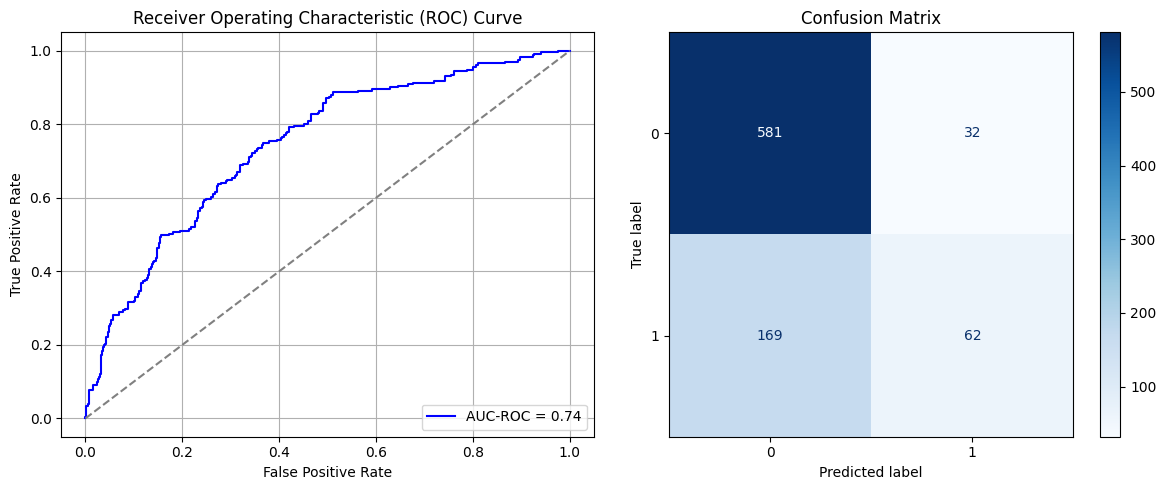

Best threshold based on F1-score: 0.2837596535682678


In [ ]:
train_and_evaluate(model_target, X_T_train, X_T_test, y_T_train, y_T_test, "Target as Source")

## SRS Sample for Training on Source Domain:

In [ ]:
np.random.seed(123)
data_S_SRS = data_S.sample(frac=0.1)
print(data_S_SRS)

        HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
333858       1         1          1 -0.360490       0       1   
248330       1         1          1  1.606620       0       0   
418532       0         0          1 -1.117071       0       0   
107940       1         0          1 -0.057858       0       0   
176206       1         1          1  0.547407       0       0   
...        ...       ...        ...       ...     ...     ...   
304997       1         0          1 -0.057858       0       0   
75295        1         1          1  0.850039       0       0   
126688       0         1          1  2.514516       1       0   
369141       0         0          1 -1.419703       1       0   
58496        0         0          1 -1.117071       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
333858                     0             0       1        1  ...            0   
248330                     0             1       1       

In [ ]:
X_S_SRS = data_S_SRS.iloc[:, :21]  ## Source domain


y_S_SRS = data_S_SRS.iloc[:, 21]  ## Source classification (response)

# X_S_SRS, y_S_SRS = sampler.fit_resample(X_S_SRS1, y_S_SRS1)

print(X_S_SRS.shape)
print(y_S_SRS.shape)

(43069, 21)
(43069,)


Use "X_S_SRS" as source domain and "y_S_SRS" as source classification for training the DNN, and use "X_T_full" and "y_T_full" for target domain and classification for TL.

In [ ]:
# Splitting the dataset into training and testing sets
X_S_SRS_train, X_S_SRS_test, y_S_SRS_train, y_S_SRS_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.2, random_state=123)

In [ ]:
model_SRS = create_dnn_model(X_S_SRS_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9400 - loss: 0.2908 - val_AUC: 0.9991 - val_loss: 0.0371
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9994 - loss: 0.0274 - val_AUC: 0.9997 - val_loss: 0.0168
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9999 - loss: 0.0108 - val_AUC: 0.9996 - val_loss: 0.0108
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9999 - loss: 0.0068 - val_AUC: 0.9996 - val_loss: 0.0080
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 1.0000 - loss: 0.0052 - val_AUC: 0.9998 - val_loss: 0.0074
Epoch 6/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - AUC: 0.9999 - loss: 0.0056 - val_AUC: 0.9993 - val_loss: 0.0090
Epoch 7/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9998 - loss: 0.0041 - val_AUC: 0.9990 - val_loss: 0.0098
Epoch 8/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 1.0000 - loss: 0.0050 - val_AUC: 0.9991 - val_loss: 0.0108
Epoch 9/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AU

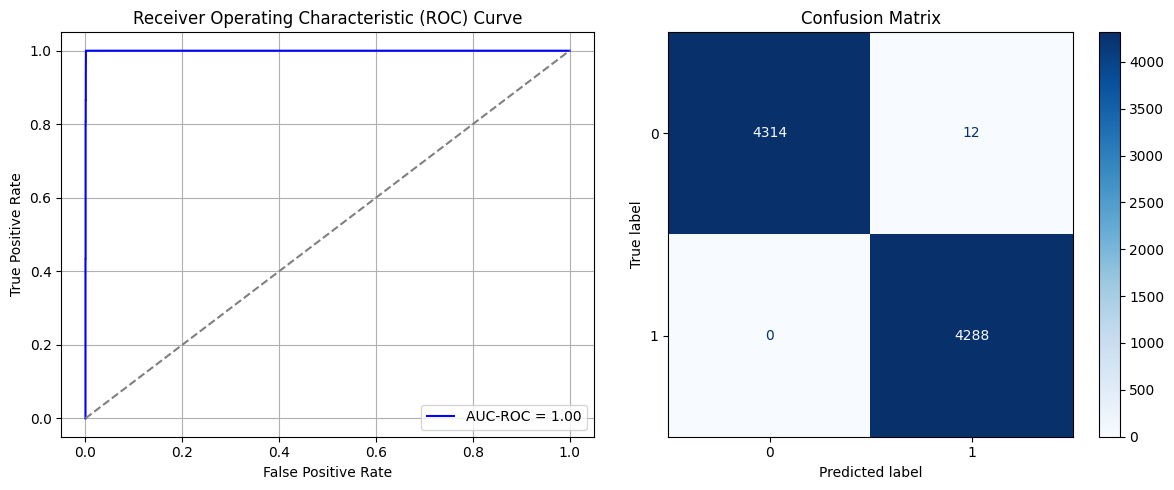

Best threshold based on F1-score: 0.9944608807563782


In [ ]:
train_and_evaluate(model_SRS, X_S_SRS_train, X_S_SRS_test, y_S_SRS_train, y_S_SRS_test, "Source")

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.6398 - loss: 4.0737 - val_AUC: 0.7038 - val_loss: 0.5703
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7128 - loss: 0.5539 - val_AUC: 0.7023 - val_loss: 0.5654
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7469 - loss: 0.5388 - val_AUC: 0.7077 - val_loss: 0.5654
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7380 - loss: 0.5323 - val_AUC: 0.7158 - val_loss: 0.5576
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7496 - loss: 0.5134 - val_AUC: 0.7250 - val_loss: 0.5557
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7463 - loss: 0.5281 - val_AUC: 0.7209 - val_loss: 0.5577
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7543 - loss: 0.5242 - val_AUC: 0.7226 - val_loss: 0.5523
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7597 - loss: 0.5167 - val_AUC: 0.7219 - val_loss: 0.5530
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7856 - loss: 

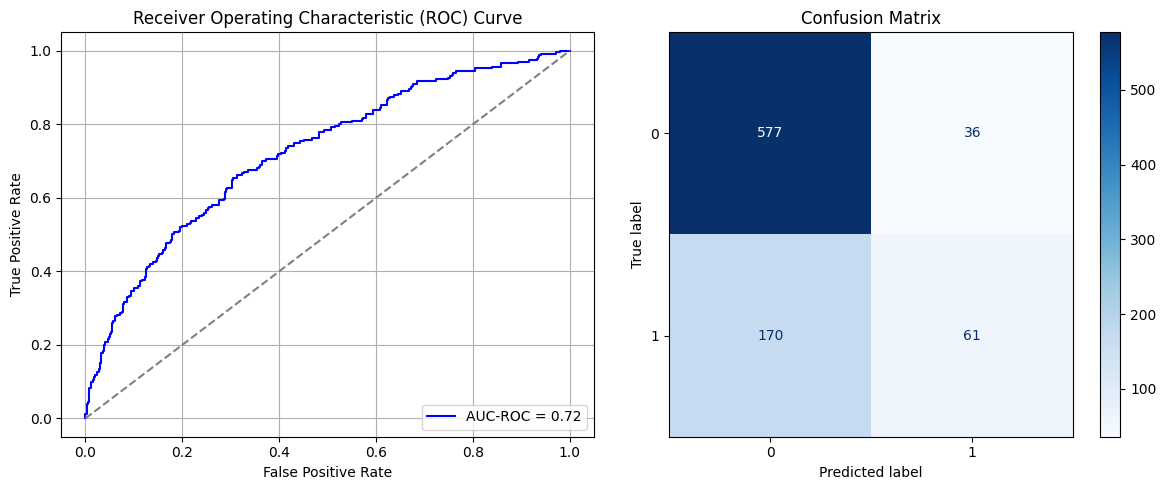

Best threshold based on F1-score: 0.32116684317588806


In [ ]:
train_and_evaluate(model_SRS, X_T_train, X_T_test, y_T_train, y_T_test, "Target")

## Stratified Sample for Training on Source Domain: (NOT IMPLEMENTED YET)

In [ ]:
systematic_index = np.arange(0, len(data_S), 5)  # considering every 5th element for systematic sampling
data_S_systematic = data_S.iloc[systematic_index]
X_S_systematic1 = data_S_systematic.iloc[:, :21]  ## Source domain


y_S_systematic1 = data_S_systematic.iloc[:, 21] ## Source classification (response)

X_S_systematic, y_S_systematic = sampler.fit_resample(X_S_systematic1, y_S_systematic1)

# Train-test splitting
X_S_train_systematic, X_S_test_systematic, y_S_train_systematic, y_S_test_systematic = train_test_split(X_S_systematic, y_S_systematic, test_size=0.8, random_state=123)


In [ ]:
model_systematic = create_dnn_model((X_S_train_systematic.shape[1],))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5161 - loss: 0.9432 - val_accuracy: 0.5735 - val_loss: 0.6653
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.6457 - val_accuracy: 0.6544 - val_loss: 0.6094
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.6257 - val_accuracy: 0.7004 - val_loss: 0.5708
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.5727 - val_accuracy: 0.7224 - val_loss: 0.5523
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7163 - loss: 0.5675 - val_accuracy: 0.7463 - val_loss: 0.5409
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7294 - loss: 0.5521 - val_accuracy: 0.7482 - val_loss: 0.5324
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7337 - loss: 0.5359 - val_accuracy: 0.7500 - val_loss: 0.5261
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7295 - loss: 0.5372 - val_accuracy: 0.7592 - val_loss:

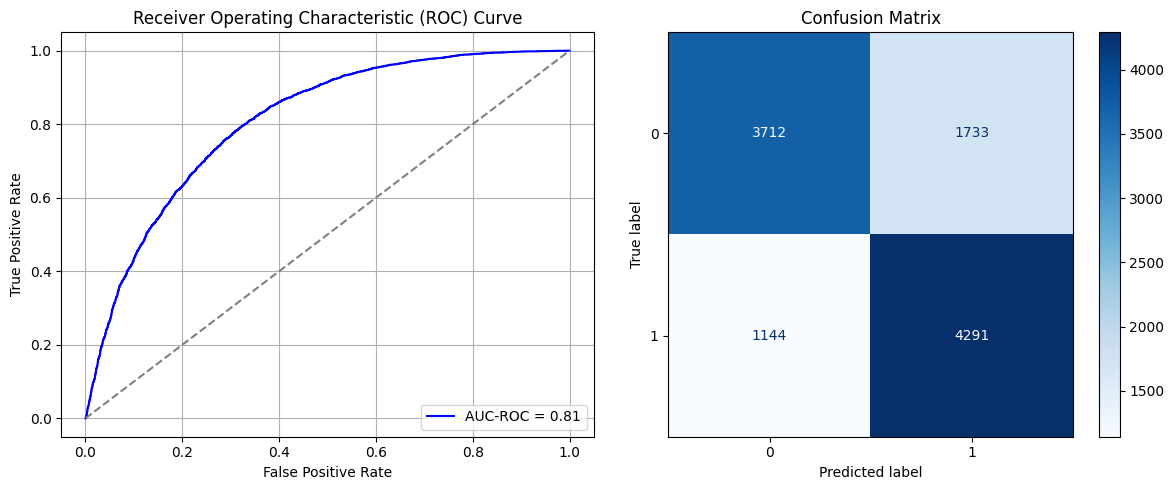

Best threshold based on F1-score: 0.40998348593711853


In [ ]:
train_and_evaluate(model_systematic, X_S_train_systematic, X_S_test_systematic, y_S_train_systematic, y_S_test_systematic, "Source")

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6051 - loss: 0.6802 - val_accuracy: 0.6963 - val_loss: 0.5608
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.5589 - val_accuracy: 0.7052 - val_loss: 0.5544
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7301 - loss: 0.5190 - val_accuracy: 0.6963 - val_loss: 0.5450
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.5314 - val_accuracy: 0.6919 - val_loss: 0.5416
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5358 - val_accuracy: 0.6978 - val_loss: 0.5383
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7284 - loss: 0.5279 - val_accuracy: 0.6978 - val_loss: 0.5373
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7317 - loss: 0.5266 - val_accuracy: 0.7007 - val_loss: 0.5420
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7518 - loss: 0.5147 - val_accuracy: 0.6978 - val_loss:

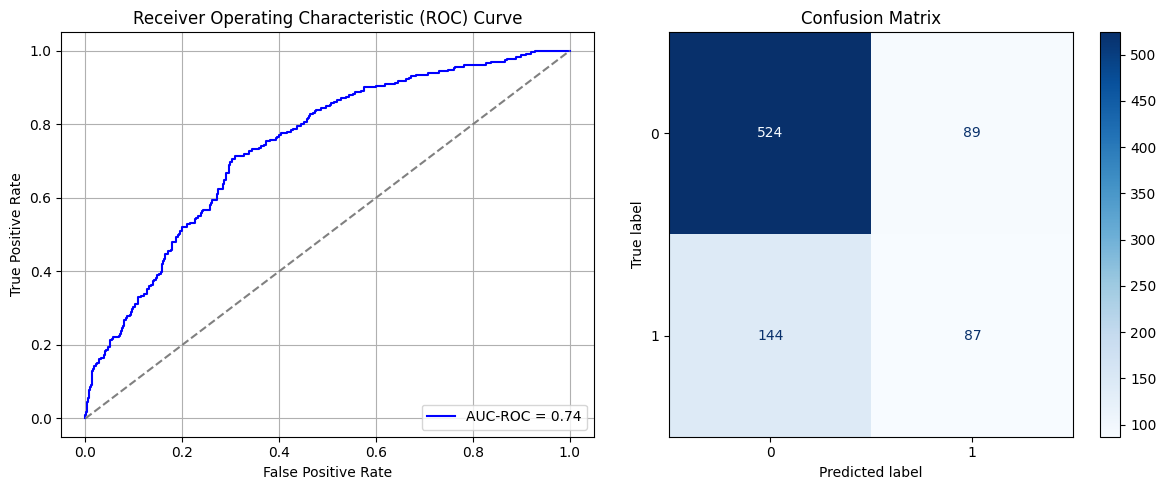

Best threshold based on F1-score: 0.38766083121299744


In [ ]:
train_and_evaluate(model_systematic, X_T_train, X_T_test, y_T_train, y_T_test, "Target")

## Systematic Sample for Training on Source Domain:

In [ ]:
systematic_index = np.arange(0, len(data_S), 5)  # considering every 5th element for systematic sampling
data_S_systematic = data_S.iloc[systematic_index]
X_S_systematic = data_S_systematic.iloc[:, :21]  ## Source domain


y_S_systematic = data_S_systematic.iloc[:, 21] ## Source classification (response)

# X_S_systematic, y_S_systematic = sampler.fit_resample(X_S_systematic1, y_S_systematic1)

# Train-test splitting
X_S_train_systematic, X_S_test_systematic, y_S_train_systematic, y_S_test_systematic = train_test_split(X_S_systematic, y_S_systematic, test_size=0.8, random_state=123)


In [ ]:
model_systematic = create_dnn_model(X_S_train_systematic.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8668 - loss: 0.4437 - val_AUC: 0.9818 - val_loss: 0.1638
Epoch 2/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9864 - loss: 0.1331 - val_AUC: 0.9945 - val_loss: 0.0773
Epoch 3/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9959 - loss: 0.0619 - val_AUC: 0.9986 - val_loss: 0.0439
Epoch 4/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9985 - loss: 0.0356 - val_AUC: 0.9995 - val_loss: 0.0276
Epoch 5/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9988 - loss: 0.0241 - val_AUC: 0.9997 - val_loss: 0.0204
Epoch 6/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9994 - loss: 0.0171 - val_AUC: 0.9996 - val_loss: 0.0152
Epoch 7/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9996 - loss: 0.0182 - val_AUC: 0.9997 - val_loss: 0.0135
Epoch 8/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9997 - loss: 0.0116 - val_AUC: 0.9996 - val_loss: 0.0137
Epoch 9/10
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

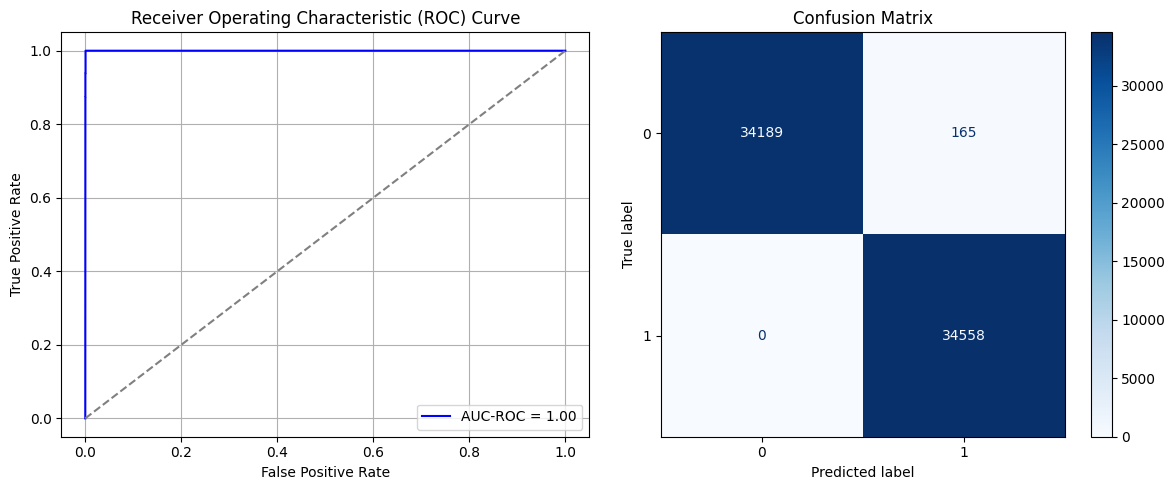

Best threshold based on F1-score: 0.987629234790802


In [ ]:
train_and_evaluate(model_systematic, X_S_train_systematic, X_S_test_systematic, y_S_train_systematic, y_S_test_systematic, "Source")

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.6440 - loss: 2.1290 - val_AUC: 0.6880 - val_loss: 0.5711
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7054 - loss: 0.5564 - val_AUC: 0.7321 - val_loss: 0.5452
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7489 - loss: 0.5205 - val_AUC: 0.7385 - val_loss: 0.5392
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7499 - loss: 0.5282 - val_AUC: 0.7476 - val_loss: 0.5354
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7661 - loss: 0.5104 - val_AUC: 0.7536 - val_loss: 0.5295
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7608 - loss: 0.5153 - val_AUC: 0.7529 - val_loss: 0.5311
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7700 - loss: 0.5134 - val_AUC: 0.7557 - val_loss: 0.5289
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7637 - loss: 0.5033 - val_AUC: 0.7584 - val_loss: 0.5348
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7679 - loss: 

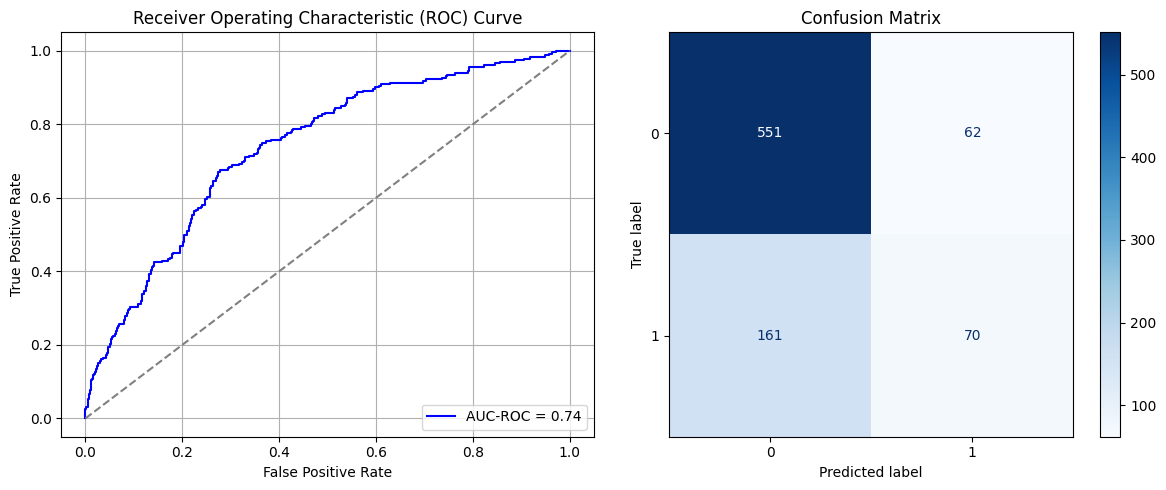

Best threshold based on F1-score: 0.35017135739326477


In [ ]:
train_and_evaluate(model_systematic, X_T_train, X_T_test, y_T_train, y_T_test, "Target")